# Day 6: Probably a Fire Hazard

https://adventofcode.com/2015/day/6

In [144]:
f = open("./data/input06.txt")
commands = []
for l in f.readlines():
    com = l.strip("\n").replace("turn ","").replace("through ","").split(" ")
    x0 = com[1].split(",")
    x1 = com[2].split(",")
    commands.append([com[0],(int(x0[0]),int(x0[1])),(int(x1[0]),int(x1[1]))])

In [145]:
import numpy as np

lights = np.zeros((1000,1000),dtype=int)

for c in commands:
    s = (c[2][0]+1-c[1][0],c[2][1]+1-c[1][1])
    if c[0] == "on":
        lights[c[1][0]:c[2][0]+1,c[1][1]:c[2][1]+1] = np.ones((s),dtype=int)
    elif c[0] == "off":
        lights[c[1][0]:c[2][0]+1,c[1][1]:c[2][1]+1] = np.zeros((s),dtype=int)
    elif c[0] == "toggle":
        lights[c[1][0]:c[2][0]+1,c[1][1]:c[2][1]+1] = 1 - lights[c[1][0]:c[2][0]+1,c[1][1]:c[2][1]+1]

print("Lit lights =",sum(sum(lights)))

Lit lights = 569999


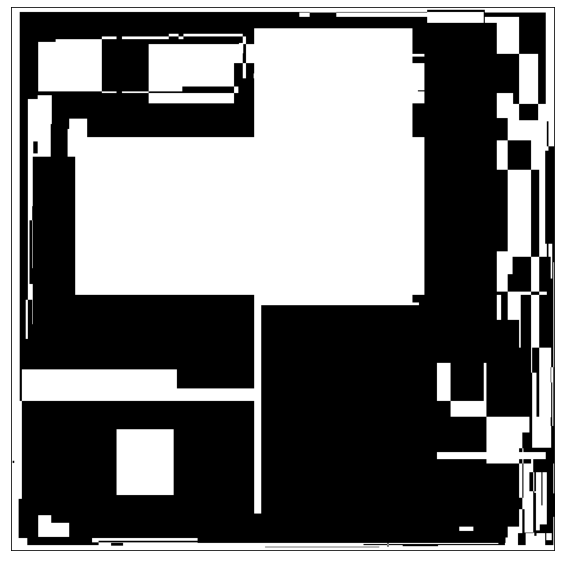

In [146]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(lights,cmap="binary")
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.show()

In [147]:
import numpy as np

lights2 = np.zeros((1000,1000),dtype=int)

for c in commands:
    s = (c[2][0]+1-c[1][0],c[2][1]+1-c[1][1])
    if c[0] == "on":
        lights2[c[1][0]:c[2][0]+1,c[1][1]:c[2][1]+1] += np.ones((s),dtype=int)
    elif c[0] == "off":
        #decrease the brightness of those lights by 1, to a minimum of zero.
        l = lights2[c[1][0]:c[2][0]+1,c[1][1]:c[2][1]+1] - np.ones((s),dtype=int)
        l[l<0] = 0
        lights2[c[1][0]:c[2][0]+1,c[1][1]:c[2][1]+1] = l
    elif c[0] == "toggle":
        lights2[c[1][0]:c[2][0]+1,c[1][1]:c[2][1]+1] += 2*np.ones((s),dtype=int)

print("Total brightness =",sum(sum(lights2)))

Total brightness = 17836115


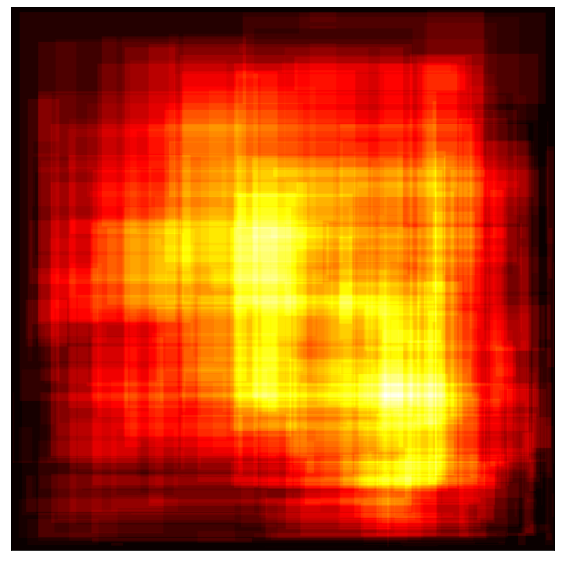

In [148]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(lights2,cmap="hot")
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.show()